# Census Income Prediction dataset project

### Prediction of income

In [28]:
#import all the required liabraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Import/ Reading the dataset

In [29]:
df=pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Information about the data

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous. Final weight on cps files

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Target- salary <=50 or >=50

In [30]:
df.shape

(32560, 15)

In [31]:
df.columns


Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [33]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [34]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [35]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week'], object: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']}

In [92]:
df_cat=df[['Workclass', 'Education', 'Marital_status', 'Occupation',
        'Relationship', 'Race', 'Sex', 'Native_country', 'Income']].copy()
df_cat

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [36]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [37]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [38]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

There is no null values present in the dataset , but " ?" is present their in the categorical columns , so we can treat them with mode.

In [42]:
# Rplaceing " ?" with mode 
import scipy.stats
W_mode= df['Workclass'].mode()
W_mode


0     Private
dtype: object

In [43]:
# Rplaceing " ?" with mode 
df['Workclass']=df['Workclass'].replace({" ?":"Private"})

In [44]:
O_mode= df["Occupation"].mode()
O_mode

0     Prof-specialty
dtype: object

In [45]:
df['Occupation']=df['Occupation'].replace({" ?":"Prof-specialty"})

In [46]:
N_mode= df["Native_country"].mode()
N_mode

0     United-States
dtype: object

In [47]:
df["Native_country"]=df["Native_country"].replace({" ?":"United-States"})

In [48]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', 'Private', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [49]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', 'Prof-specialty', ' Protective-serv',
       ' Armed-Forces', ' Priv-house-serv'], dtype=object)

In [50]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', 'United-States',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [55]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

Now, we can proceed further for EDA.

# EDA/ Data Analysis

In [54]:
#Statistical summary

df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


From the above we can see that there is a significant difference between 75% and max capital-gain,capital-loss and hours-per-week, skewness is there and SD is very high in some columns so outliers may be present.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

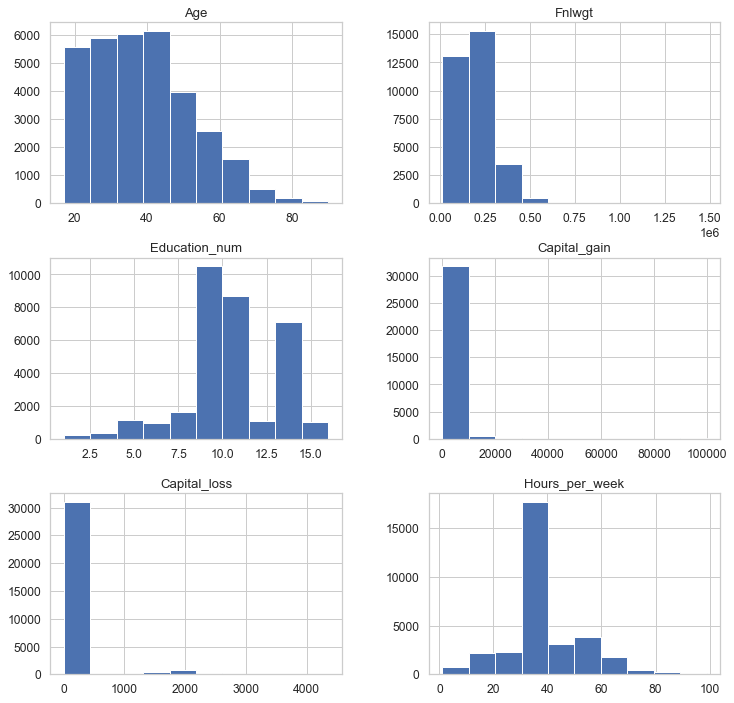

In [57]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1)
df.hist(figsize=(12,12))

Skewness is there .

<AxesSubplot:xlabel='Income', ylabel='count'>

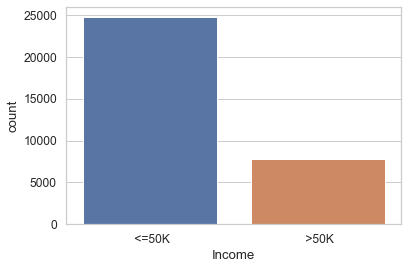

In [61]:
sns.countplot(df['Income'])

There are more people having <=50k salary as compare to more than 50 k .

<AxesSubplot:xlabel='Income', ylabel='count'>

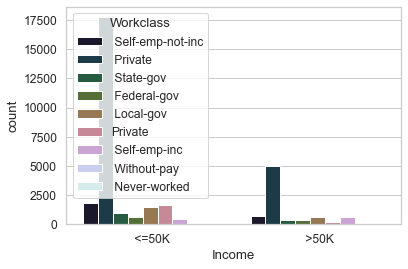

In [62]:
sns.set_style('whitegrid')
sns.countplot(x= 'Income', hue='Workclass', data=df, palette='cubehelix')

Most of the people having >50k belongs to private workclass.

<AxesSubplot:xlabel='Income', ylabel='count'>

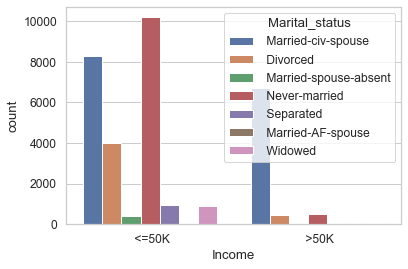

In [65]:
sns.set_style('whitegrid')
sns.countplot(x= 'Income', hue='Marital_status', data=df)

Most of the people having >50 k are married-civ-spouse.

<AxesSubplot:xlabel='Income', ylabel='count'>

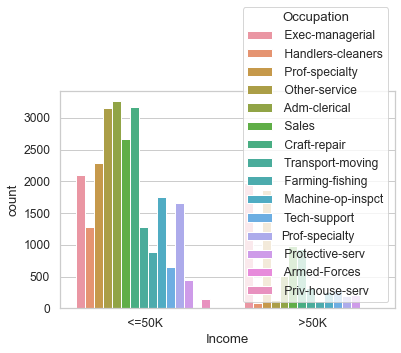

In [66]:
sns.set_style('whitegrid')
sns.countplot(x= 'Income', hue='Occupation', data=df)

In [2]:
#sns.catplot(x='Income',y='Age',data=df,kind='swarm')   #taking time

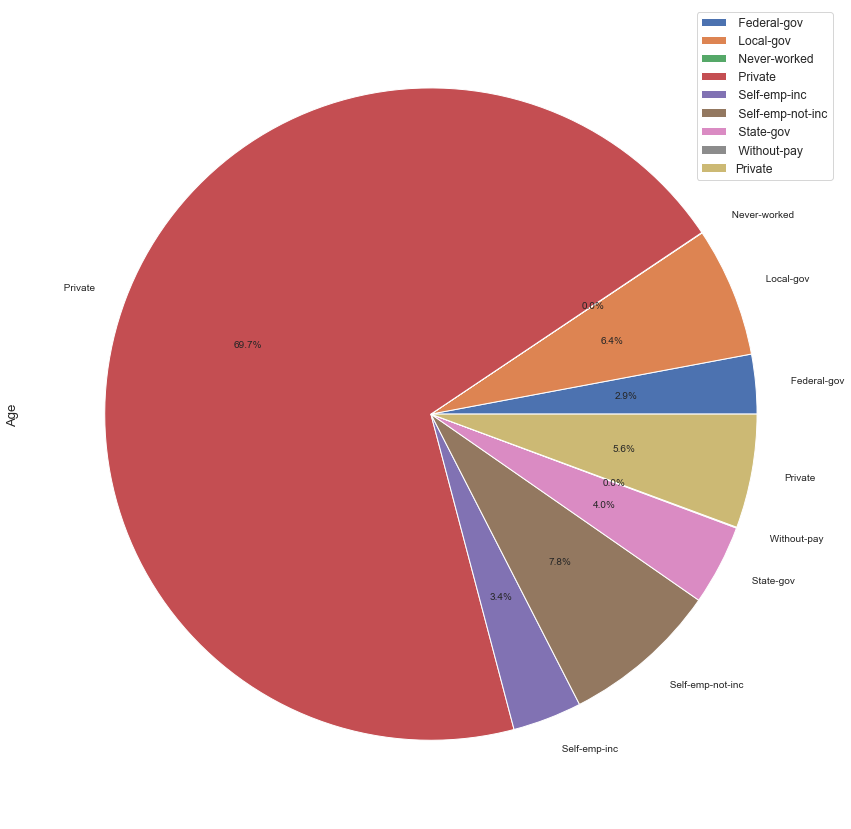

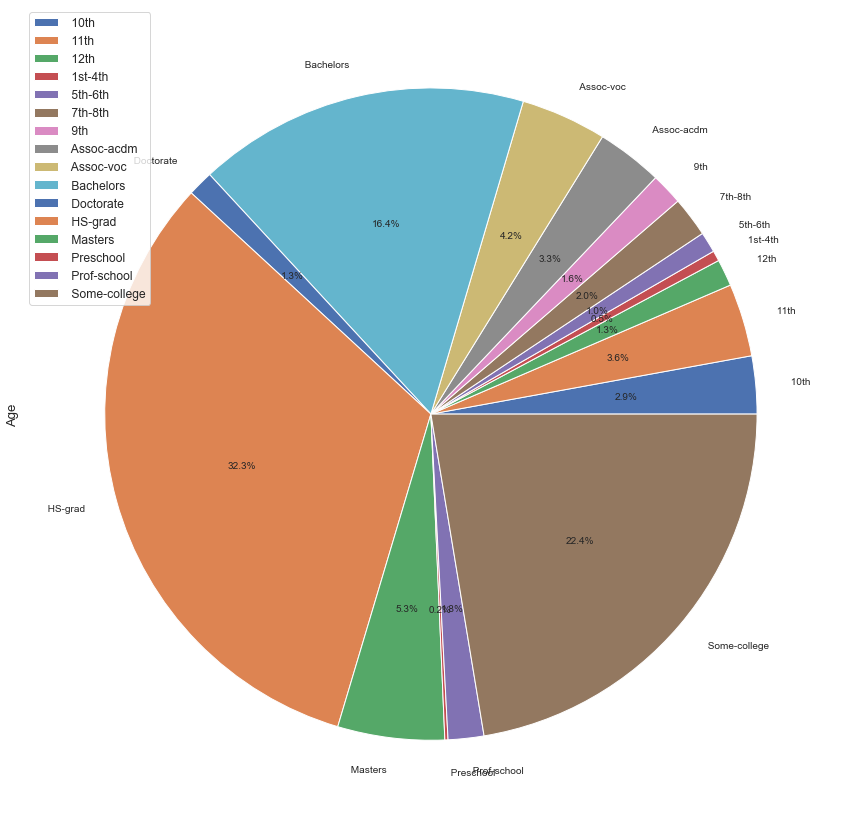

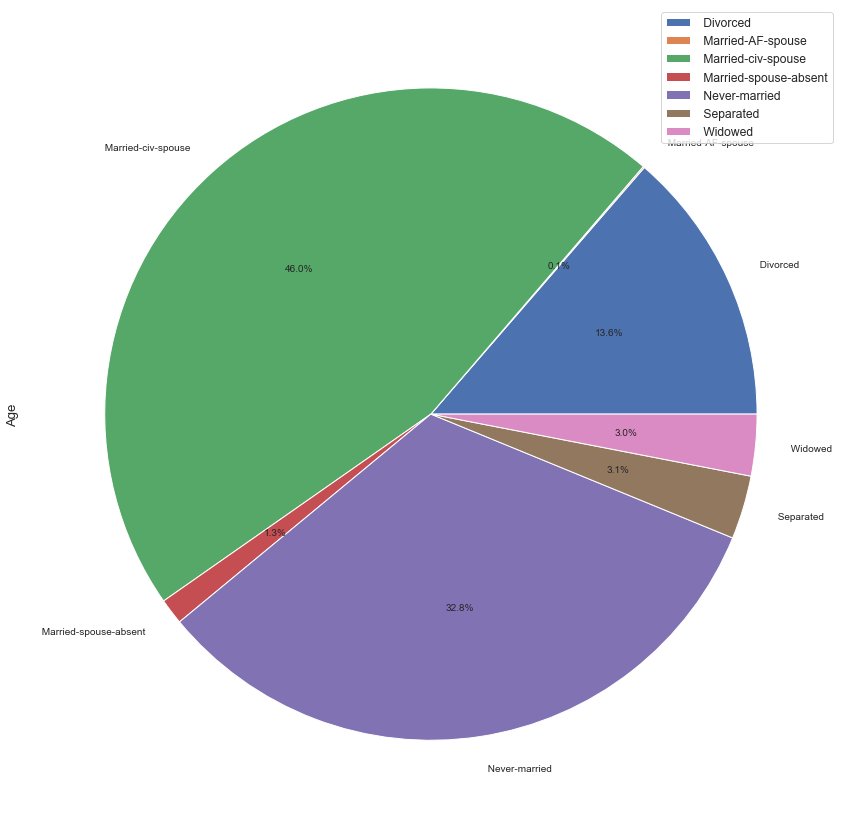

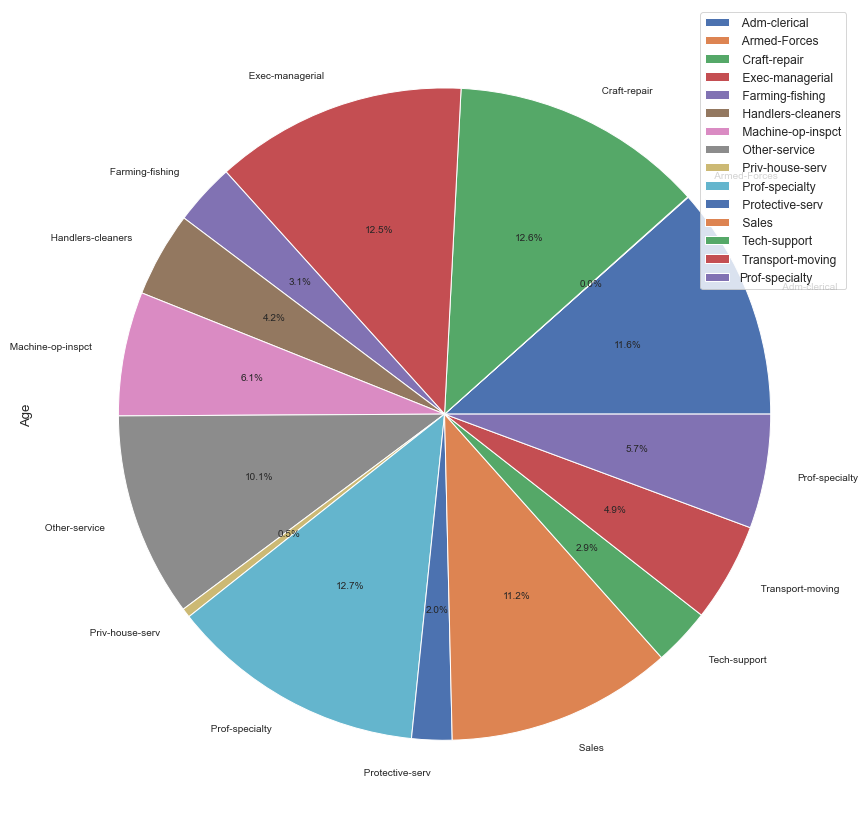

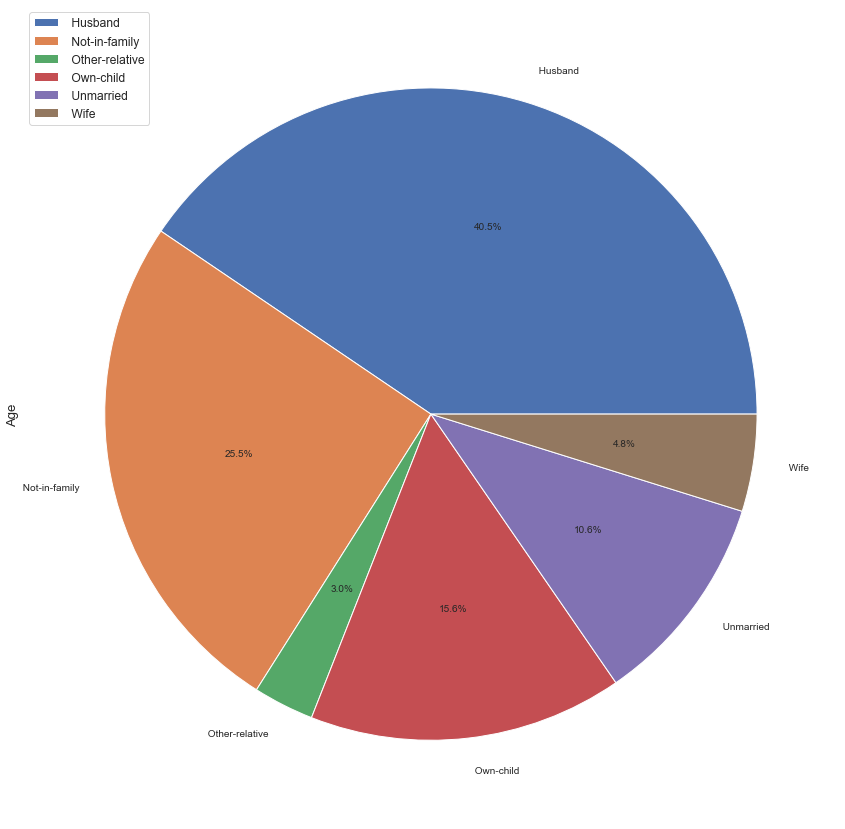

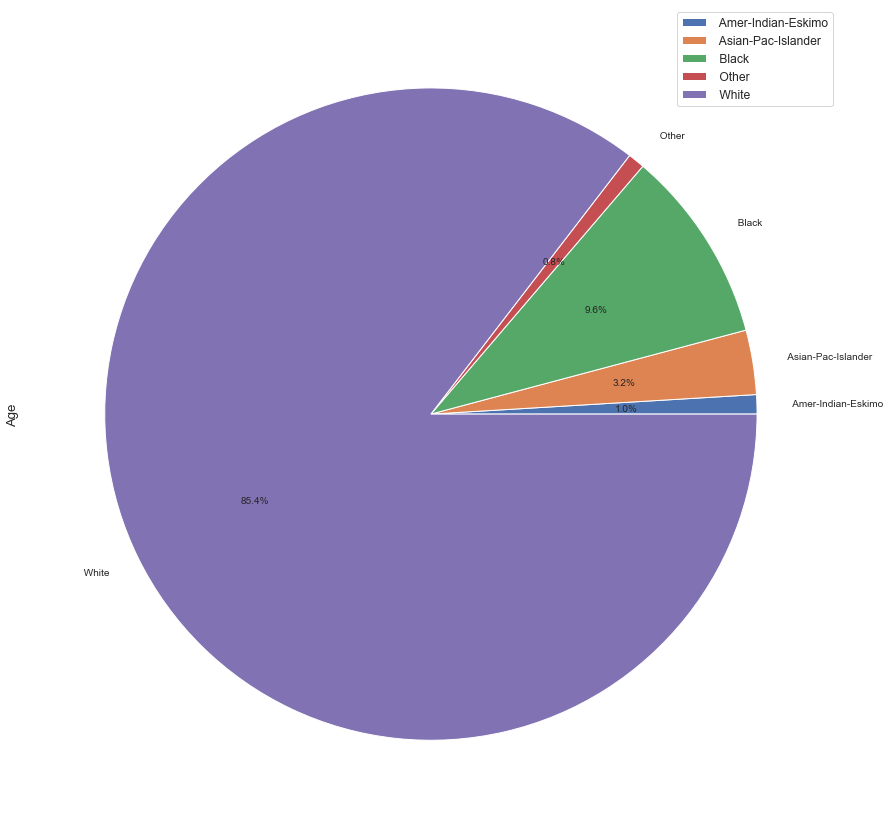

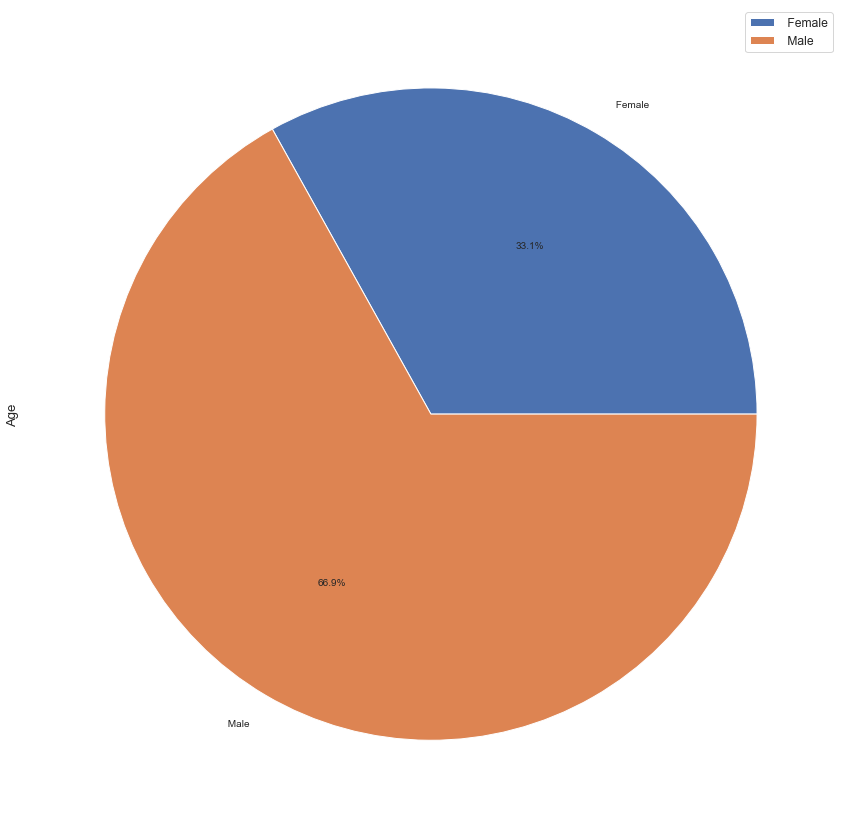

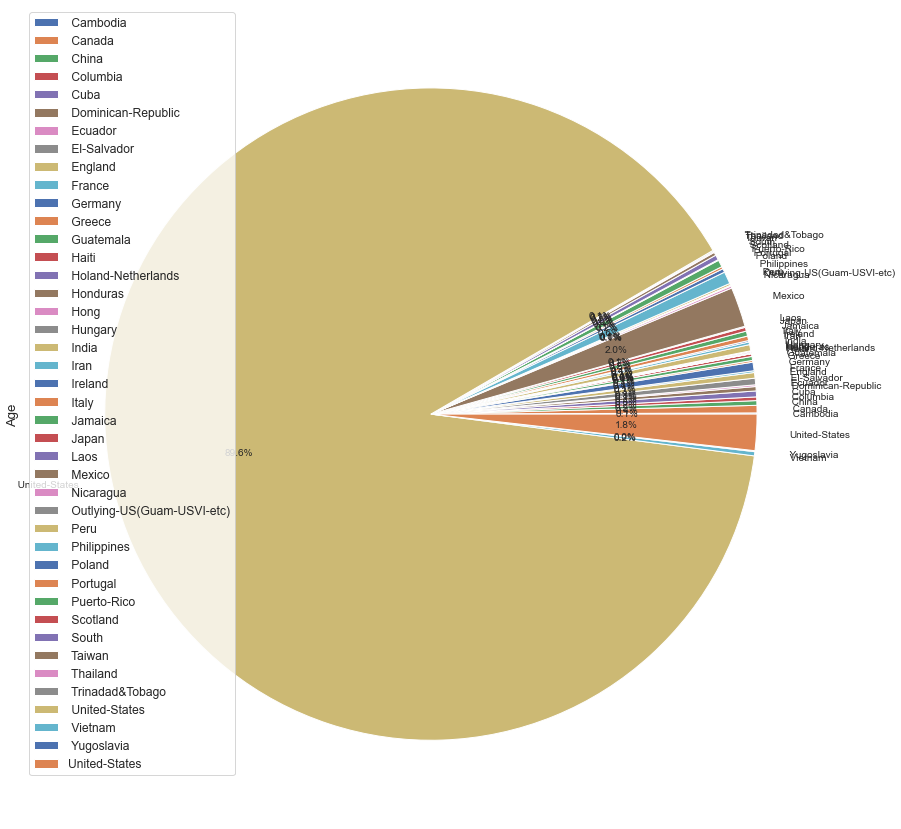

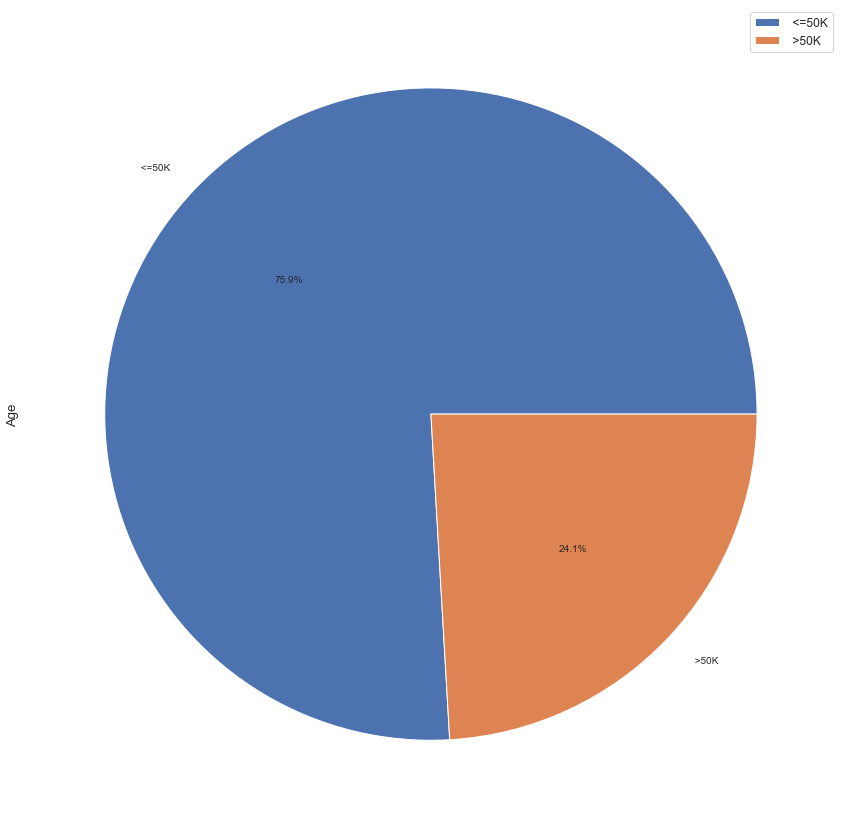

In [75]:
for feature in df_cat:
        pie = df.groupby(feature).count().plot(kind='pie', 
                                            y='Age', 
                                            autopct='%1.1f%%', 
                                            figsize=(15, 15), 
                                            fontsize=10)

From the above we can see a lots of details like males have high majority as working and in most of the families Husbands are working, and majority of races are white, most of the peoples are married and most of the people's occupations are other services, most of the peoples are HS-grad, most of the people are working for private companies.

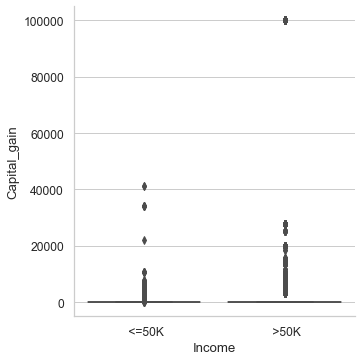

In [77]:

sns.catplot(x="Income",y="Capital_gain",data=df,kind='box')

From the above we can see that most of the peoples who have income more that 50K have higher capital gain compared to people with less than 50K

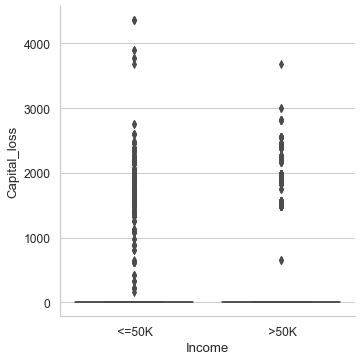

In [78]:
sns.catplot(x="Income",y="Capital_loss",data=df,kind='box')

From the above we can see that most of the peoples who have income more that 50K have lower capital loss compared to people with less than 50K

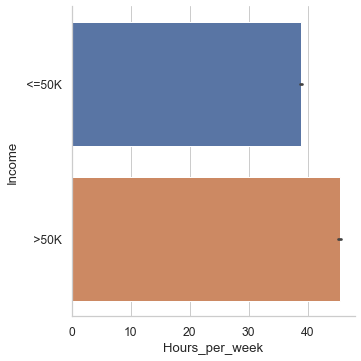

In [80]:
sns.catplot(x="Hours_per_week",y="Income",data=df,kind='bar')

From the above we can see that most of the people who are earning more than 50K are spending more than 40 hrs per week.

# Label encoding

In [87]:
#lets drop not required columns
#df.drop(['Fnlwgt'],axis=1,inplace=True)

In [93]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
for cols in df.columns:
    if pd.api.types.is_object_dtype(df[cols]):
        df[cols] = df[cols].astype('category')
        df[cols] = le.fit_transform(df[cols])

In [94]:
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,11,9,4,0,3,4,1,0,0,20,38,0


In [96]:
#correlation

df_corr= df.corr()
df_corr

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.059424,-0.010508,0.036527,-0.266292,0.012628,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000176,0.234039
Workclass,0.059424,1.000000,-0.019358,-0.054412,0.042191,0.312611,0.012832,0.018893,0.002270,0.010680,-0.009878,-0.093413,0.001240,-0.055098
Education,-0.010508,-0.019358,1.000000,0.359172,-0.038398,-0.046460,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.075189,0.079311
Education_num,0.036527,-0.054412,0.359172,1.000000,-0.069338,0.044150,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.090270,0.335182
Marital_status,-0.266292,0.042191,-0.038398,-0.069338,1.000000,0.052891,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.020463,-0.199295
Occupation,0.012628,0.312611,-0.046460,0.044150,0.052891,1.000000,-0.014638,-0.009948,0.026149,0.012357,0.004530,-0.056999,-0.000467,0.010777
Relationship,-0.263698,0.012832,-0.010879,-0.094145,0.185461,-0.014638,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010938,-0.250924
Race,0.028718,0.018893,0.014135,0.031825,-0.068025,-0.009948,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.111294,0.071853
Sex,0.088832,0.002270,-0.027349,0.012256,-0.129337,0.026149,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.003007,0.215995
Capital_gain,0.077674,0.010680,0.030047,0.122627,-0.043398,0.012357,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,0.009650,0.223333


<AxesSubplot:>

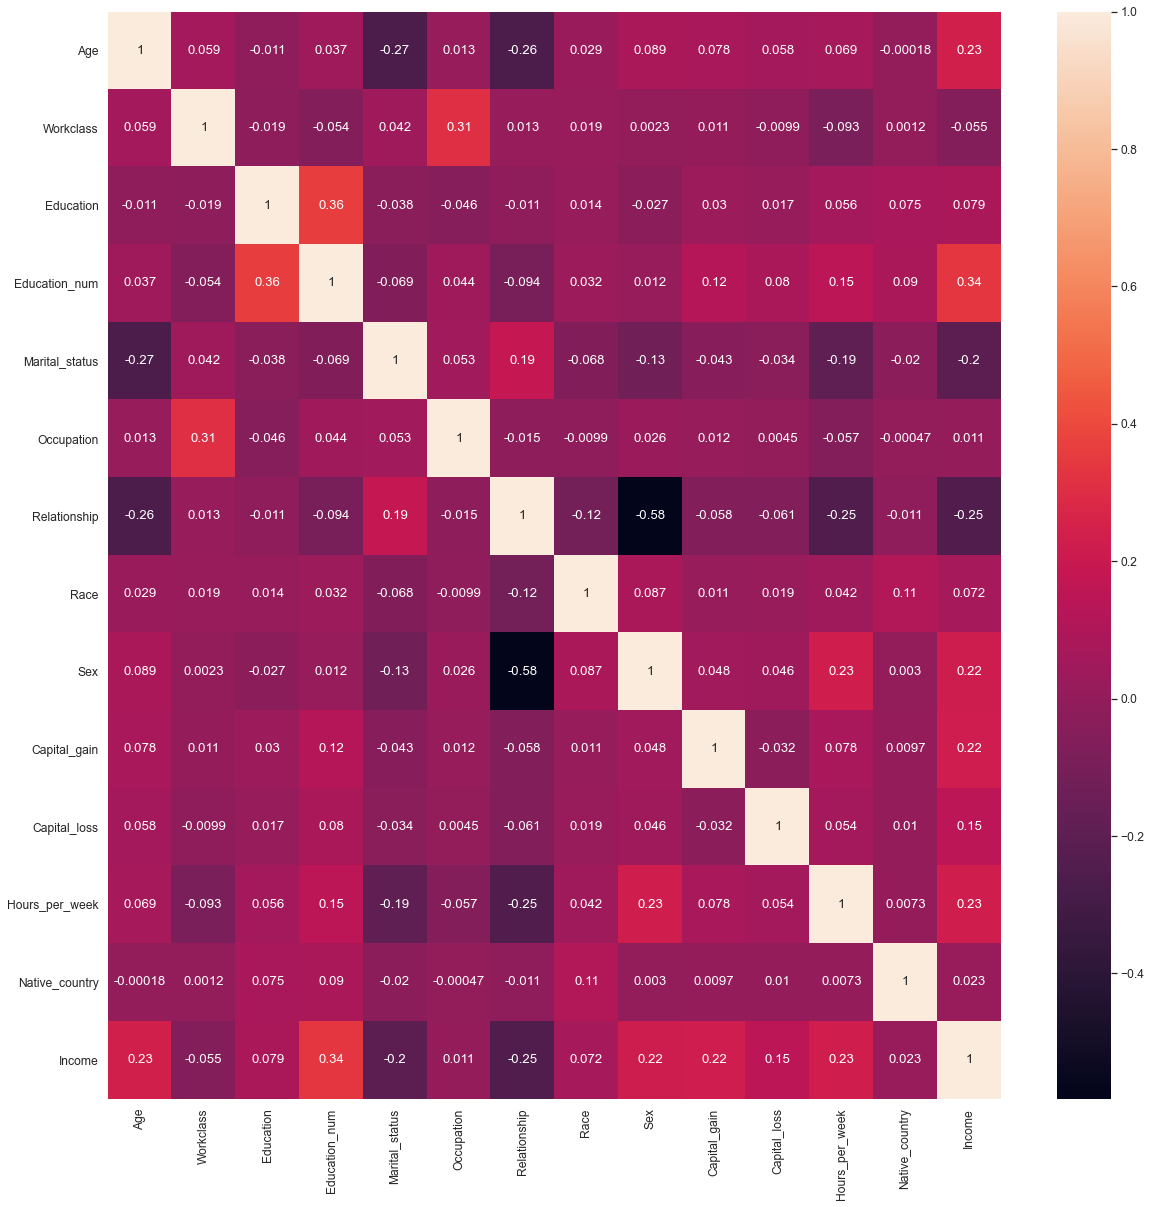

In [97]:
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot=True)


Education and race are more correlated with income.

Age                  AxesSubplot(0.125,0.657941;0.133621x0.222059)
Workclass         AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Education          AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Education_num     AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Marital_status    AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Occupation           AxesSubplot(0.125,0.391471;0.133621x0.222059)
Relationship      AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Race               AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Sex               AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Capital_gain      AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Capital_loss            AxesSubplot(0.125,0.125;0.133621x0.222059)
Hours_per_week       AxesSubplot(0.285345,0.125;0.133621x0.222059)
Native_country        AxesSubplot(0.44569,0.125;0.133621x0.222059)
Income               AxesSubplot(0.606034,0.125;0.133621x0.222059)
dtype: object

<Figure size 1440x1440 with 0 Axes>

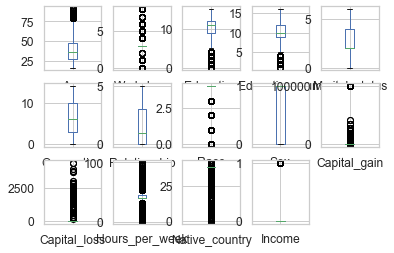

In [103]:
plt.figure(figsize=(20,20))
df.plot(kind ='box', subplots= True, layout= (3,5) )

# Outliers

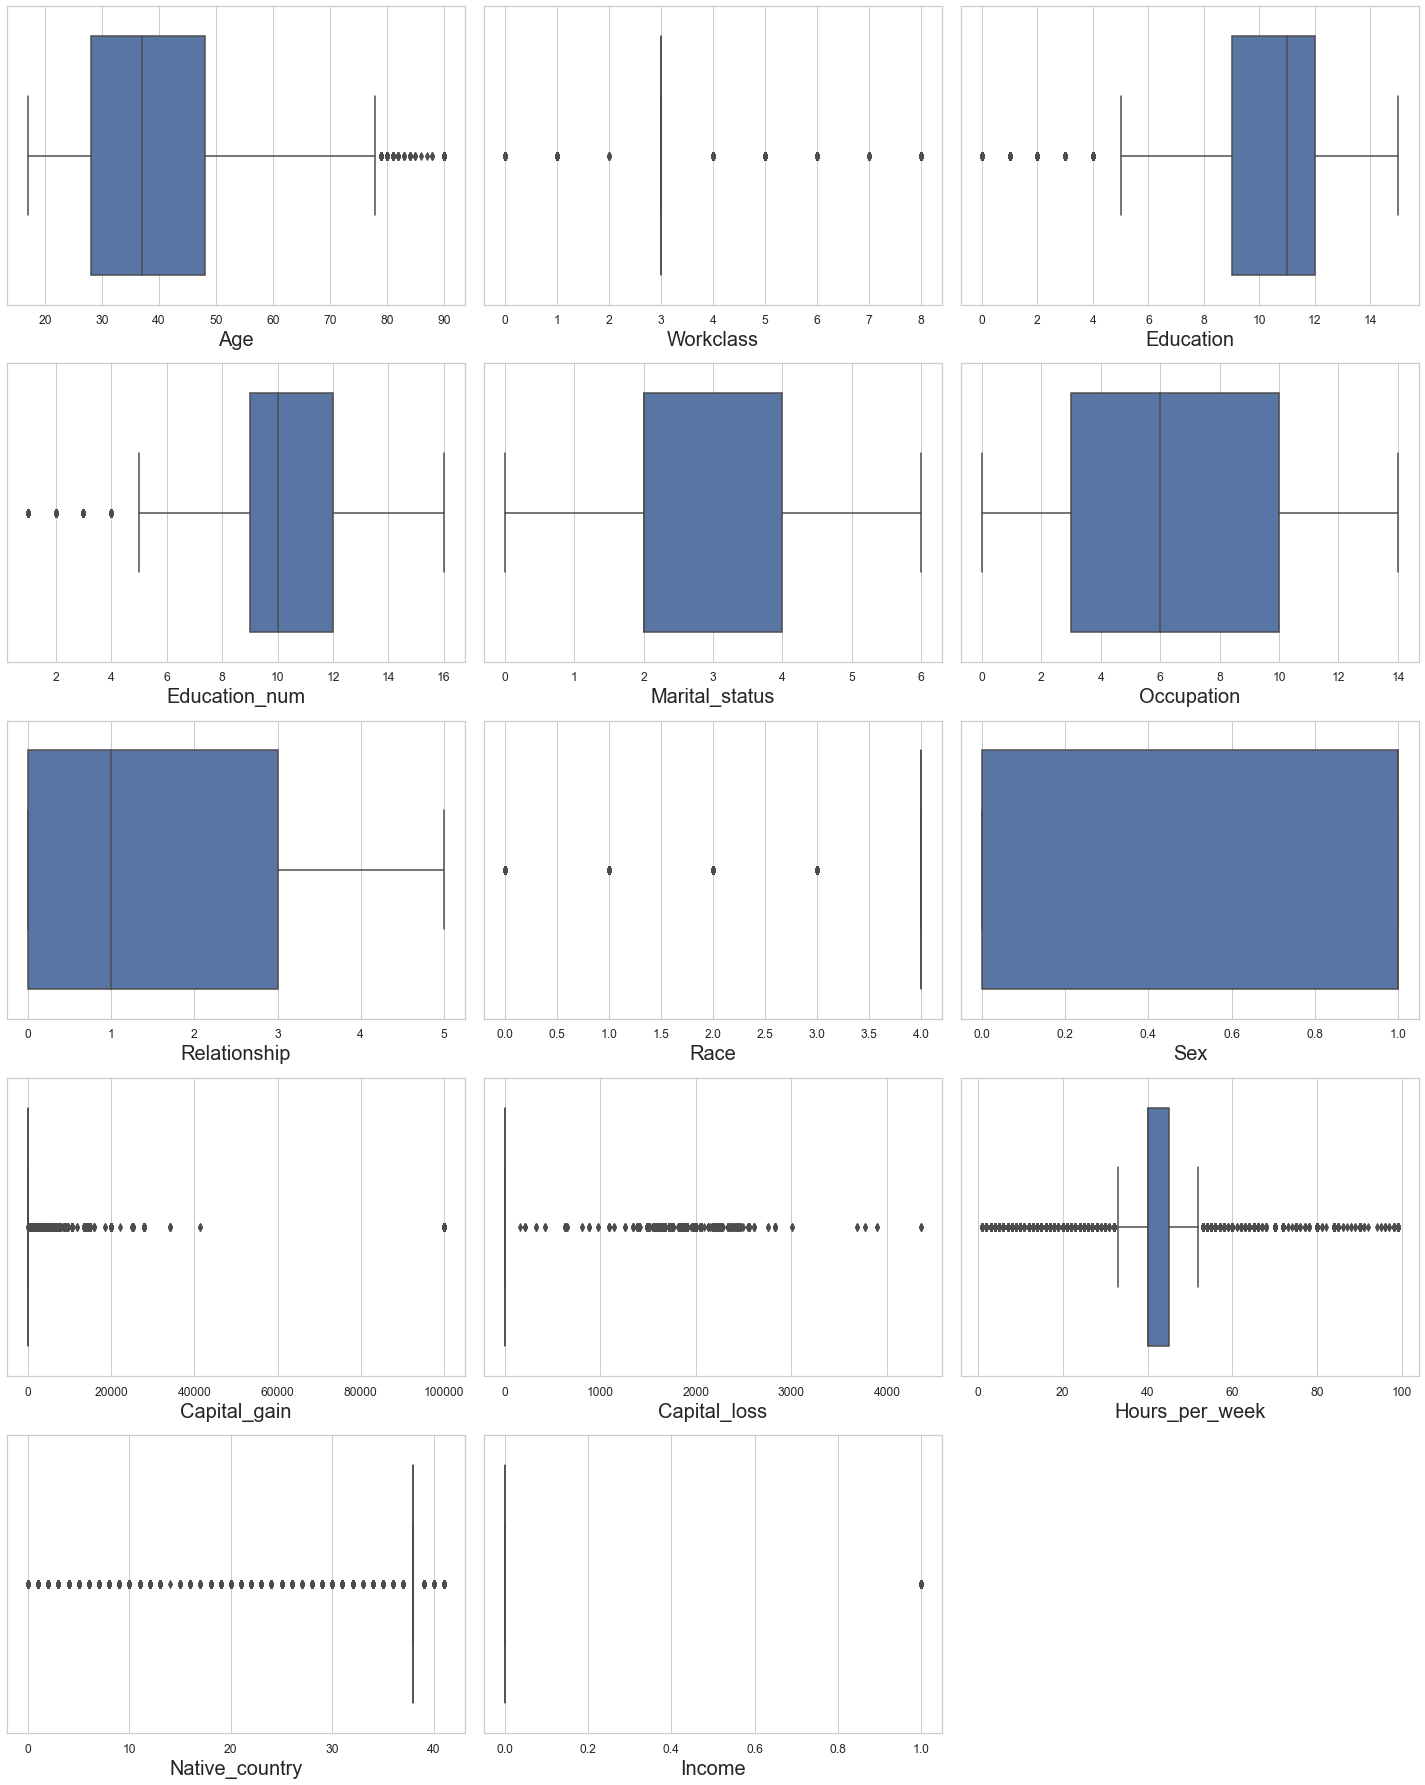

In [105]:
#lets check for outliers using box plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [106]:
from scipy.stats import zscore
zscore = abs(zscore(df))
df_new = df.loc[(zscore<3).all(axis = 1)]
print(df.shape)
print(df_new.shape)

(32560, 14)
(28094, 14)


In [113]:
df_new.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,1.791759,9,13,2,3,0.000000,4,1,0.0,0.0,13,38,0.0
1,38,1.386294,11,9,0,5,0.693147,4,1,0.0,0.0,40,38,0.0
2,53,1.386294,1,7,2,5,0.000000,2,1,0.0,0.0,40,38,0.0
4,37,1.386294,12,14,2,3,1.791759,4,0,0.0,0.0,40,38,0.0
5,49,1.386294,6,5,3,7,0.693147,2,0,0.0,0.0,16,22,0.0


In [121]:
le = LabelEncoder()
df_new["Income"]=le.fit_transform(df_new["Income"])

In [123]:
df_new.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,1.791759,9,13,2,3,0.000000,4,1,0.0,0.0,13,38,0
1,38,1.386294,11,9,0,5,0.693147,4,1,0.0,0.0,40,38,0
2,53,1.386294,1,7,2,5,0.000000,2,1,0.0,0.0,40,38,0
4,37,1.386294,12,14,2,3,1.791759,4,0,0.0,0.0,40,38,0
5,49,1.386294,6,5,3,7,0.693147,2,0,0.0,0.0,16,22,0


# Skewness

In [107]:
df_new.skew()

Age                0.487970
Workclass          1.184891
Education         -0.955307
Education_num     -0.148137
Marital_status    -0.047045
Occupation         0.136941
Relationship       0.751844
Race              -2.549513
Sex               -0.689828
Capital_gain       4.926969
Capital_loss      29.686789
Hours_per_week    -0.360363
Native_country    -5.119005
Income             1.323336
dtype: float64

In [108]:
#with log tranform method

for cols in df_new.columns:
    if df_new.skew().loc[cols] > 0.5:
        df_new[cols] = np.log1p(df_new[cols])

In [109]:
df_new.skew()

Age                0.487970
Workclass         -1.140127
Education         -0.955307
Education_num     -0.148137
Marital_status    -0.047045
Occupation         0.136941
Relationship       0.254352
Race              -2.549513
Sex               -0.689828
Capital_gain       3.110852
Capital_loss      25.153275
Hours_per_week    -0.360363
Native_country    -5.119005
Income             1.323336
dtype: float64

# Splitting and scaling the dataset

In [124]:
x=df_new.iloc[:,:-1]
x.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,1.791759,9,13,2,3,0.000000,4,1,0.0,0.0,13,38
1,38,1.386294,11,9,0,5,0.693147,4,1,0.0,0.0,40,38
2,53,1.386294,1,7,2,5,0.000000,2,1,0.0,0.0,40,38
4,37,1.386294,12,14,2,3,1.791759,4,0,0.0,0.0,40,38
5,49,1.386294,6,5,3,7,0.693147,2,0,0.0,0.0,16,22


In [125]:
y=df_new['Income']
y.head()

0    0
1    0
2    0
4    0
5    0
Name: Income, dtype: int64

In [133]:
#Applying the standard scaling on the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.88732151,  0.99695551, -0.34361224, ..., -0.03992559,
        -2.41677715,  0.16825206],
       [-0.00912056, -0.04948047,  0.17210442, ..., -0.03992559,
         0.00714197,  0.16825206],
       [ 1.11143203, -0.04948047, -2.40647887, ..., -0.03992559,
         0.00714197,  0.16825206],
       ...,
       [ 1.48494956, -0.04948047,  0.17210442, ..., -0.03992559,
         0.00714197,  0.16825206],
       [-1.20437666, -0.04948047,  0.17210442, ..., -0.03992559,
        -1.78835367,  0.16825206],
       [ 1.03672853,  0.5264148 ,  0.17210442, ..., -0.03992559,
         0.00714197,  0.16825206]])

In [157]:
y.value_counts()

0    21798
1     6296
Name: Income, dtype: int64

## SMOTE

In [158]:
#lets use oversampling technique on minority class using smote method
#import smote from imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)
y_over.value_counts()

0    21798
1    21798
Name: Income, dtype: int64

In [159]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.20,random_state=56)

In [160]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((34876, 13), (8720, 13), (34876,), (8720,))

# ML Alogrithms

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc, f1_score,mean_squared_error,mean_absolute_error

In [142]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=56)
GNB=GaussianNB()
RFC=RandomForestClassifier(random_state=56)
GBC=GradientBoostingClassifier(random_state=56)
ABC=AdaBoostClassifier(random_state=56)
ETC=ExtraTreesClassifier(random_state=56)

In [143]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

---------------------> KNeighborsClassifier <----------------------


KNeighborsClassifier()


Accuracy_score =  0.8471330275229357


F1_score = 0.8559386145034044


Cross_Val_Score =  0.853106374873456


roc_auc_score =  0.8476442210544529


classification_report
               precision    recall  f1-score   support

           0       0.90      0.78      0.84      4393
           1       0.80      0.92      0.86      4327

    accuracy                           0.85      8720
   macro avg       0.85      0.85      0.85      8720
weighted avg       0.85      0.85      0.85      8720



[[3427  966]
 [ 367 3960]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



---------------------> SVC <----------------------


SVC()


Accuracy_score =  0.8313073394495413


F1_score = 0.8414358089899752


Cross_Val_Score =  0.8300306336568232


roc_auc_score =  0.8318384590986638


classification_report
               precision    recall  f1-score   support

           0       0.89      0.76      0.8

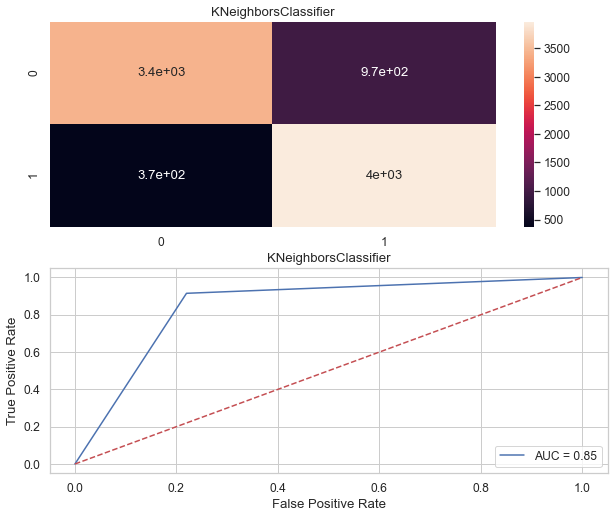

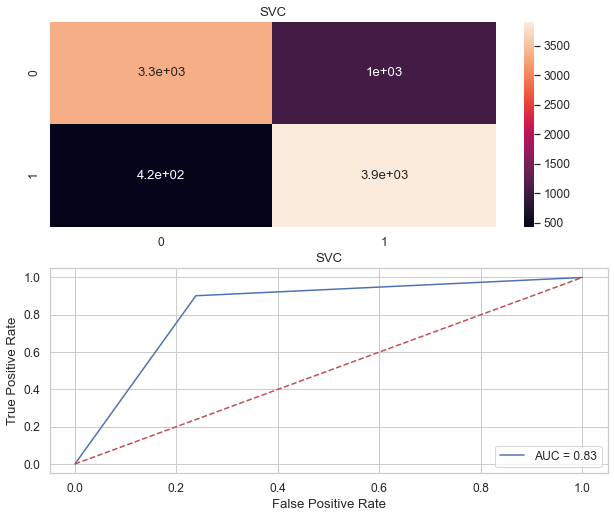

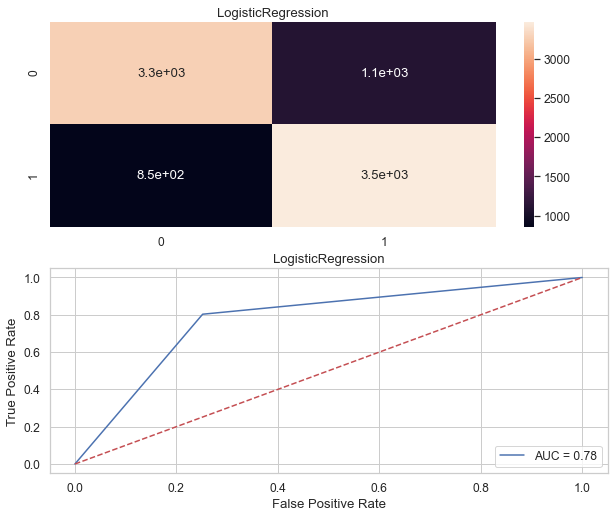

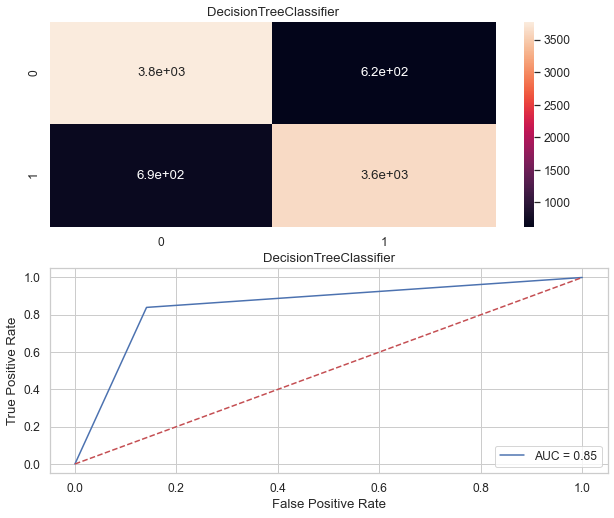

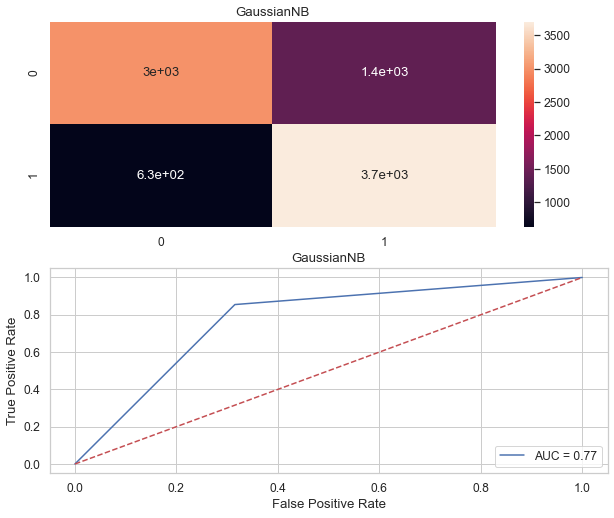

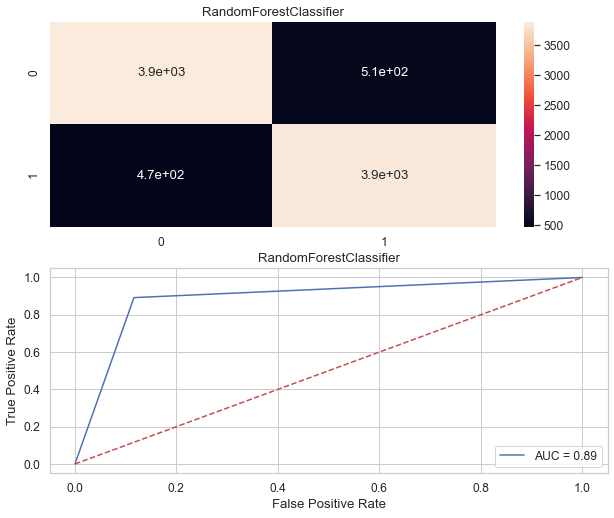

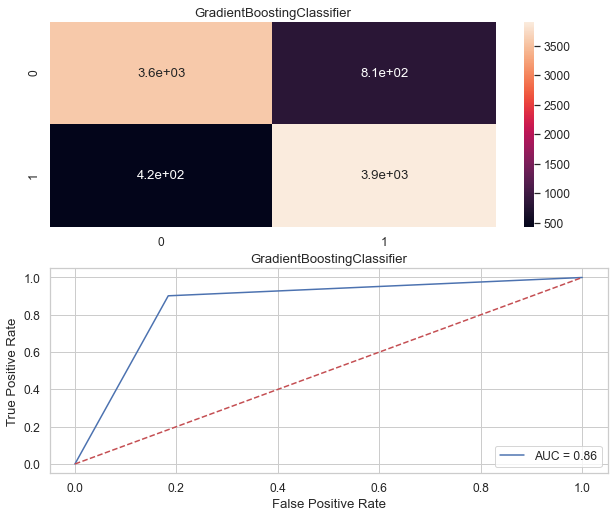

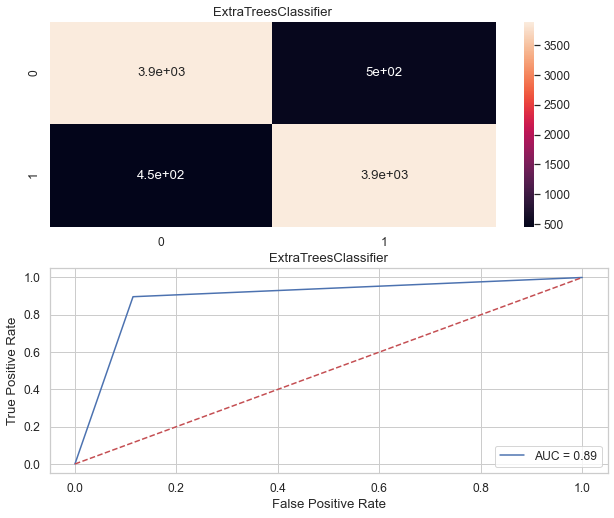

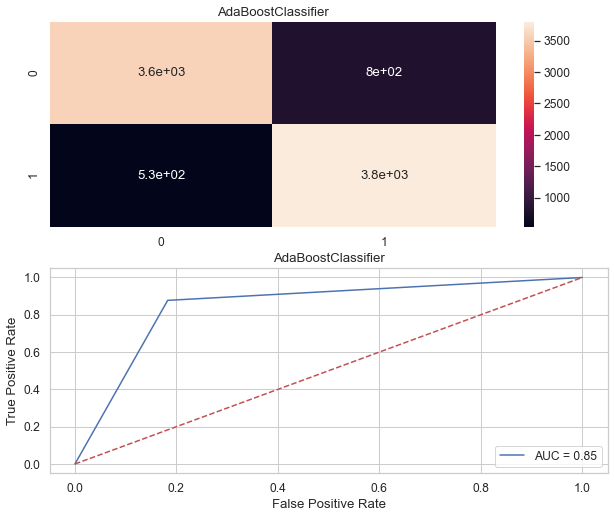

In [161]:
Model = []
score = []
F1_score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('--------------------->',name,'<----------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS)
    print('\n')
    F1=f1_score(y_test,pre)
    print('F1_score =', F1)
    F1_score.append(F1)
    print('\n')
    sc = cross_val_score(model, x_over, y_over, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [162]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score , 'F1_score': F1_score , 'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,F1_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,0.847133,0.855939,0.853106,0.847644
1,SVC,0.831307,0.841436,0.830031,0.831838
2,LogisticRegression,0.775459,0.780198,0.775301,0.775666
3,DecisionTreeClassifier,0.849312,0.846853,0.859899,0.849239
4,GaussianNB,0.769151,0.786101,0.768075,0.769795
5,RandomForestClassifier,0.887844,0.887560,0.890704,0.887876
6,GradientBoostingClassifier,0.858601,0.863561,0.858589,0.858925
7,ExtraTreesClassifier,0.891170,0.891057,0.897791,0.891213
8,AdaBoostClassifier,0.847018,0.850549,0.844689,0.847246


Most of models are performing well but not giving accuracy is the highest and crossval score is also highest, so we choose ETC Classifier as my final model as the accuracy and cross val score is high, WITH 89%.

# Saving the model

In [163]:
import joblib
joblib.dump(ETC,'Census_prediction.obj')

['Census_prediction.obj']

In [164]:
model= joblib.load("Census_prediction.obj")
model

ExtraTreesClassifier(random_state=56)

In [165]:
pred_ETC= model.predict(x_test)
print("Prediction", pred_ETC)
print("actual", y_test)

Prediction [1 1 1 ... 0 1 1]
actual 31110    1
31961    1
43536    1
41026    1
25372    0
        ..
13790    1
42147    1
13480    0
4017     0
34236    1
Name: Income, Length: 8720, dtype: int64


In [167]:
print('error:')

print('mean absolute error:', mean_absolute_error(y_test,pred_ETC))
print('mean squared error:', mean_squared_error(y_test,pred_ETC))

error:
mean absolute error: 0.1088302752293578
mean squared error: 0.1088302752293578
